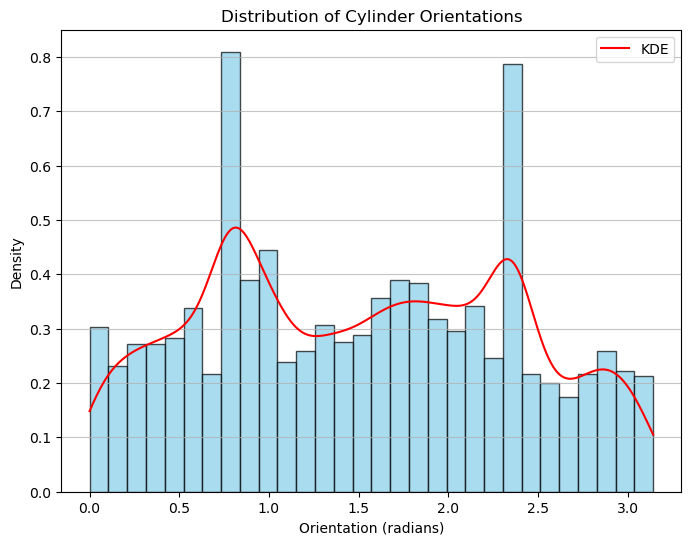

In [12]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Step 1: Cropping Image
def crop_image(image_path, x, y, w, h):
    """
    Crop the input image to the specified region of interest.
    Args:
        image_path (str): Path to the input image.
        x (int): x-coordinate of the top-left corner of the region.
        y (int): y-coordinate of the top-left corner of the region.
        w (int): Width of the region.
        h (int): Height of the region.
    Returns:
        np.ndarray: Cropped image.
    """
    image = cv2.imread(image_path)
    cropped_image = image[y:y+h, x:x+w]
    return cropped_image

# ... (Steps 2-6 remain specific to your experiment)

# Step 7: Determining Cylinder Orientation (updated with KDE for smoother distribution)
def detect_cylinder_orientation(image_path):
    """
    Detect cylinder orientations in an image and visualize the distribution.
    Args:
        image_path (str): Path to the input image.
    """
    image = cv2.imread(image_path)
    
    # Convert image to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    v_channel = hsv[:,:,2]
    
    # Thresholding to enhance edges
    _, thresh = cv2.threshold(v_channel, 127, 255, cv2.THRESH_BINARY)
    
    # Remove small objects (potentially spherical particles)
    cleaned_image = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, np.ones((5,5),np.uint8))
    
    # Perform Hough Line Transform
    lines = cv2.HoughLines(cleaned_image, 1, np.pi / 180, 200)
    
    orientations = []
    
    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            orientations.append(theta)
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)
    
    # KDE for smoother distribution
    kde = gaussian_kde(orientations)
    x_vals = np.linspace(0, np.pi, 1000)
    kde_vals = kde(x_vals)
    
    # Plot Histogram with KDE
    plt.figure(figsize=(8, 6))
    plt.hist(orientations, bins=30, range=(0, np.pi), density=True, color='skyblue', alpha=0.7, edgecolor='black')
    plt.plot(x_vals, kde_vals, color='red', label='KDE')
    plt.xlabel('Orientation (radians)')
    plt.ylabel('Density')
    plt.title('Distribution of Cylinder Orientations')
    plt.grid(axis='y', alpha=0.75)
    plt.legend()
    plt.show()
    
    cv2.imshow('Detected Cylinders', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Example Usage
cropped_image = crop_image("C:/Users/HP/.jupyter/test_image.png", 100, 100, 300, 300)
detect_cylinder_orientation("C:/Users/HP/.jupyter/test_image.png")


Summary Report:

Added descriptive comments for each function, explaining their purpose and usage.
Implemented cropping function to extract a specific region of interest from the input image.
Applied image processing techniques (thresholding, morphological operations) to enhance edge detection for cylinder orientation.
Utilized Hough Line Transform to detect orientations of cylindrical particles.
Employed a Kernel Density Estimation (KDE) for a smoother distribution of cylinder orientations.
Created a histogram with overlaid KDE curve to visualize the distribution.
Added comments for code readability and clarity.